
# Project: Investigate a Dataset - [No Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Here is the data dictionary for this datasets as supplied together with the dataset on kaggle:

01. PatientId: Identification of a patient
02. AppointmentID: Identification of each appointment
03. Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
04. Appointment Day: The day of the actuall appointment, when they have to visit the doctor.
05. Scheduled Day: The day someone called or registered the appointment, this is before appointment of course.
06. Age: How old is the patient.
07. Neighbourhood: Where the appointment takes place.
08. Scholarship: True of False 
09. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True or False.


### Question(s) for Analysis
The question to be answered in this analysis include:

> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add magic function to display charts right within the jupyter notebook environment
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.options.display.max_rows = 999999
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv');
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#The describe() method returns description of the data in the DataFrame. 
#If the DataFrame contains numerical data, the description contains these information for each column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# The info() method prints information about the DataFrame. 
# The information contains the number of columns, column labels, column data types, memory usage, range index, 
# and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Function to change datatype for a column for the dataset. Required two arguments -  
# the column of the dataframe and the datatype of choice
def changeDataType(column, datatype):
    return df[column].astype(datatype)

In [7]:
#Check for the number of null values for each of the columns in the dataset
df.isnull().sum()
# No missing data

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing data and all data type is as required, except for the scheduledday and appointment day:

 1.   PatientId - float
 2.   AppointmentID - integer  
 3.   Gender - string 
 4.   ScheduledDay - string 
 5.   AppointmentDay - string 
 6.   Age - integer  
 7.   Neighbourhood - string 
 8.   Scholarship - integer  
 9.   Hipertension - integer  
 10.   Diabetes - integer
 11.  Alcoholism - integer
 12.  Handcap - integer
 13.  SMS_received - integer
 14.  No-show - string

In [8]:
# Updating the data type for the two dates columns from string to datetime
df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)

In [9]:
#Also the Patient Id and appointment ID are unique to each patient and is better an object data type to limit visualisation to 
# only field that matters using the changeDataType function defined earlier that takes two arguments - column name and data type
df['PatientId'] = changeDataType('PatientId','object')
df['AppointmentID'] = changeDataType('AppointmentID','object')

In [10]:
#Rename No-Show to become Noshow. Nice to have the column name without an hyphen
df.rename(columns={'No-show': 'Noshow'}, inplace=True)

In [11]:
#Show name of all columns in the dataset. Verify if No-show has been renamed to Noshow
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Noshow'],
      dtype='object')

In [12]:
# check for the number of values in the Noshow column
df['Noshow'].value_counts()

No     88208
Yes    22319
Name: Noshow, dtype: int64

In [13]:
# Map the value yes to become 1 and no to become 0.
# The Noshow column will need to be numerical for correlation and other related exploratory analysis
df['Noshow'] = df['Noshow'].map({'Yes': '1', 'No':0})

In [14]:
#Do a quick check on the Noshow column to ascertain the values have changed to numeric
df['Noshow'].head(2)

0    0
1    0
Name: Noshow, dtype: object

In [15]:
# Noshow has changed to numeric values but the datatype is still object
# Let's update the data type to integer using our earlier defined function
# The function takes in two argument - column name and data type
df['Noshow'] = changeDataType('Noshow','int')

In [16]:
# Verify the data type for the Noshow column
df['Noshow'].dtypes

dtype('int64')

In [17]:
# Create an additional column that reports the number of days between scheduled day and appointment day
# And change the data type to integer
df['Scheduled_Appointment_Interval_Days'] = ((df['AppointmentDay'] - df['ScheduledDay'])/np.timedelta64(1, 'D'))
df['Scheduled_Appointment_Interval_Days'] = changeDataType('Scheduled_Appointment_Interval_Days','int')

In [18]:
# Do a quick final check to ascertain all fields are in the correct data type, having equal numbers of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId                              110527 non-null object
AppointmentID                          110527 non-null object
Gender                                 110527 non-null object
ScheduledDay                           110527 non-null datetime64[ns]
AppointmentDay                         110527 non-null datetime64[ns]
Age                                    110527 non-null int64
Neighbourhood                          110527 non-null object
Scholarship                            110527 non-null int64
Hipertension                           110527 non-null int64
Diabetes                               110527 non-null int64
Alcoholism                             110527 non-null int64
Handcap                                110527 non-null int64
SMS_received                           110527 non-null int64
Noshow                                 110527 non-null int64
Scheduled_App

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question : 
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [19]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,Scheduled_Appointment_Interval_Days
0,2.98725e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.58998e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0


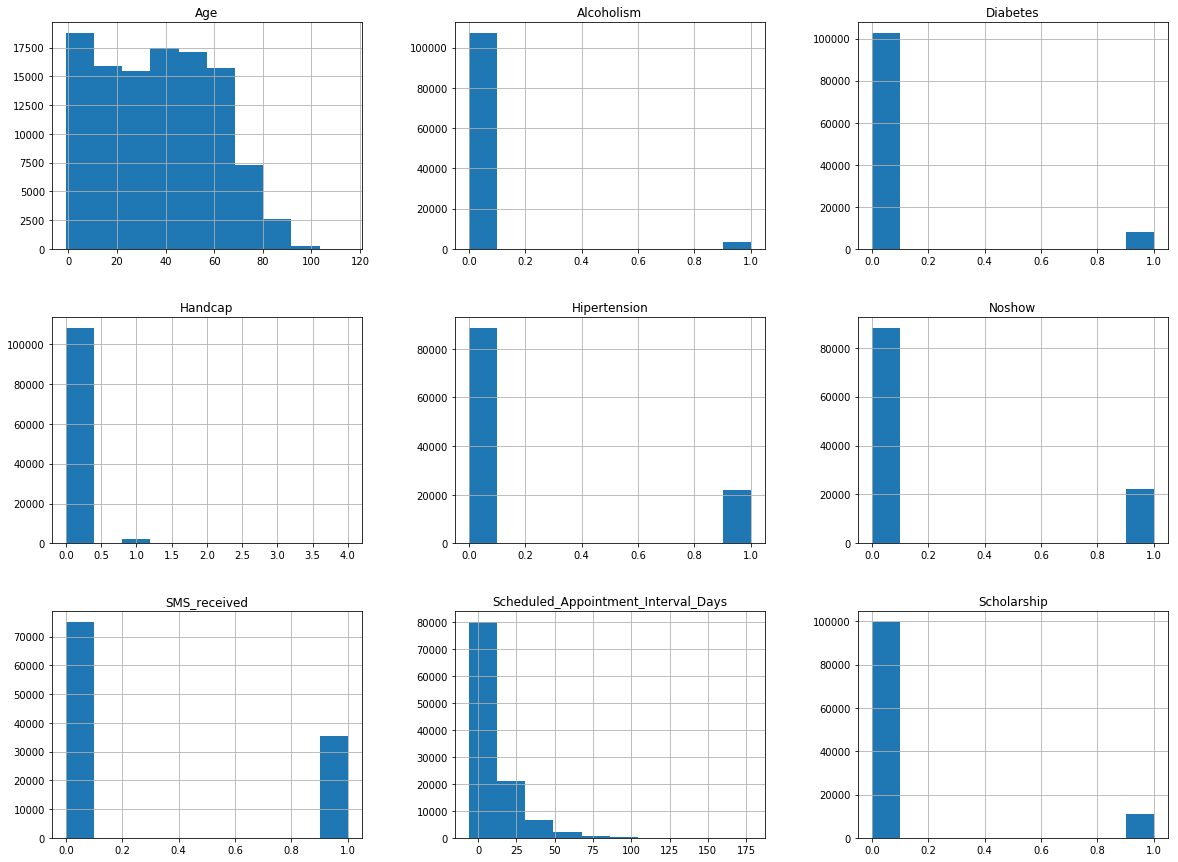

In [20]:
df.hist(figsize=(20,15));
# Histograms for the numerical columns in the dataset to give insights into analyzing the attributes of each column.

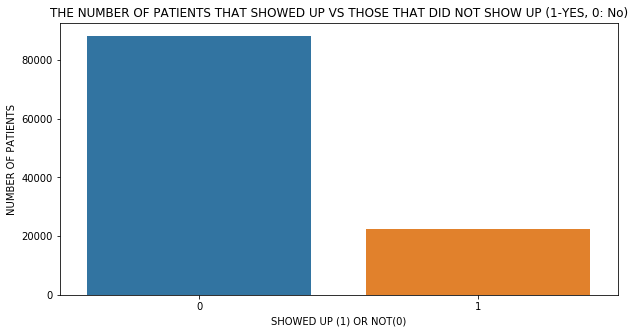

In [21]:
#Let's do a count of patients that showed up vs those that did not show up, and label accordingly
plt.figure(figsize=(10,5))
sns.countplot(x = 'Noshow', data = df) #The main focus is on noshow
plt.xlabel('SHOWED UP (1) OR NOT(0)')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('THE NUMBER OF PATIENTS THAT SHOWED UP VS THOSE THAT DID NOT SHOW UP (1-YES, 0: No)');

More patients do not show up generally compared to the number of patients that showed up for appointments.

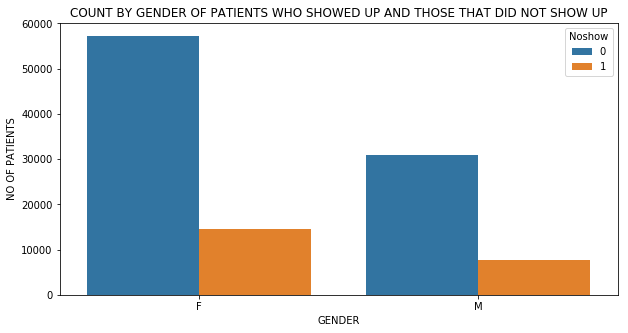

In [22]:
#Let's check the gender distribution for patients that show up and those that did not show up
plt.figure(figsize=(10,5))
sns.countplot(x = 'Gender', data = df, hue='Noshow')
plt.xlabel('GENDER')
plt.ylabel('NO OF PATIENTS')
plt.title('COUNT BY GENDER OF PATIENTS WHO SHOWED UP AND THOSE THAT DID NOT SHOW UP');

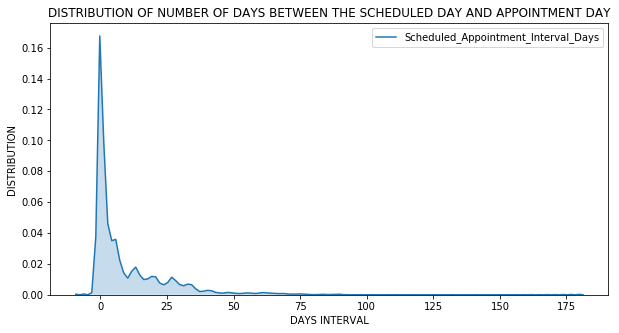

In [23]:
# Remember we created a new field earlier that calculates the number of days between scheduled day and appointment day
# Now, let's see the distribution of this interval for all patients
plt.figure(figsize=(10,5))
sns.kdeplot(df['Scheduled_Appointment_Interval_Days'], shade=True)
plt.xlabel('DAYS INTERVAL')
plt.ylabel('DISTRIBUTION')
plt.title('DISTRIBUTION OF NUMBER OF DAYS BETWEEN THE SCHEDULED DAY AND APPOINTMENT DAY');

The number of days between appointment and scheduled days shows most patients book appointment very close to the day they are to show up.

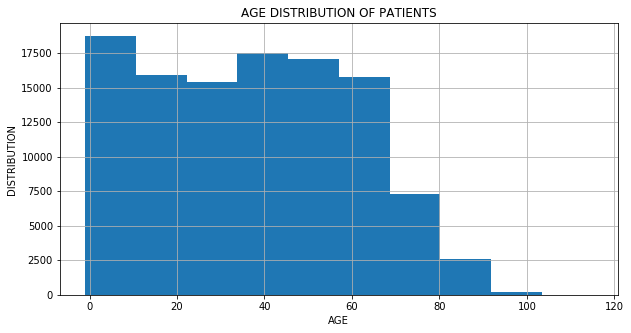

In [24]:
#Let's see the distribution of age of the patients in the datasets.
plt.figure(figsize=(10,5))
df['Age'].hist()
plt.xlabel('AGE')
plt.ylabel('DISTRIBUTION')
plt.title('AGE DISTRIBUTION OF PATIENTS');

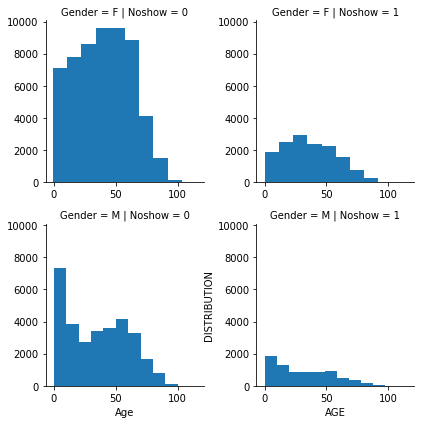

In [25]:
#How about we check for distribution by gender and age
chart = sns.FacetGrid(df, col='Noshow', row='Gender')
chart.map(plt.hist, 'Age')
plt.xlabel('AGE')
plt.ylabel('DISTRIBUTION');

There are more no show for females

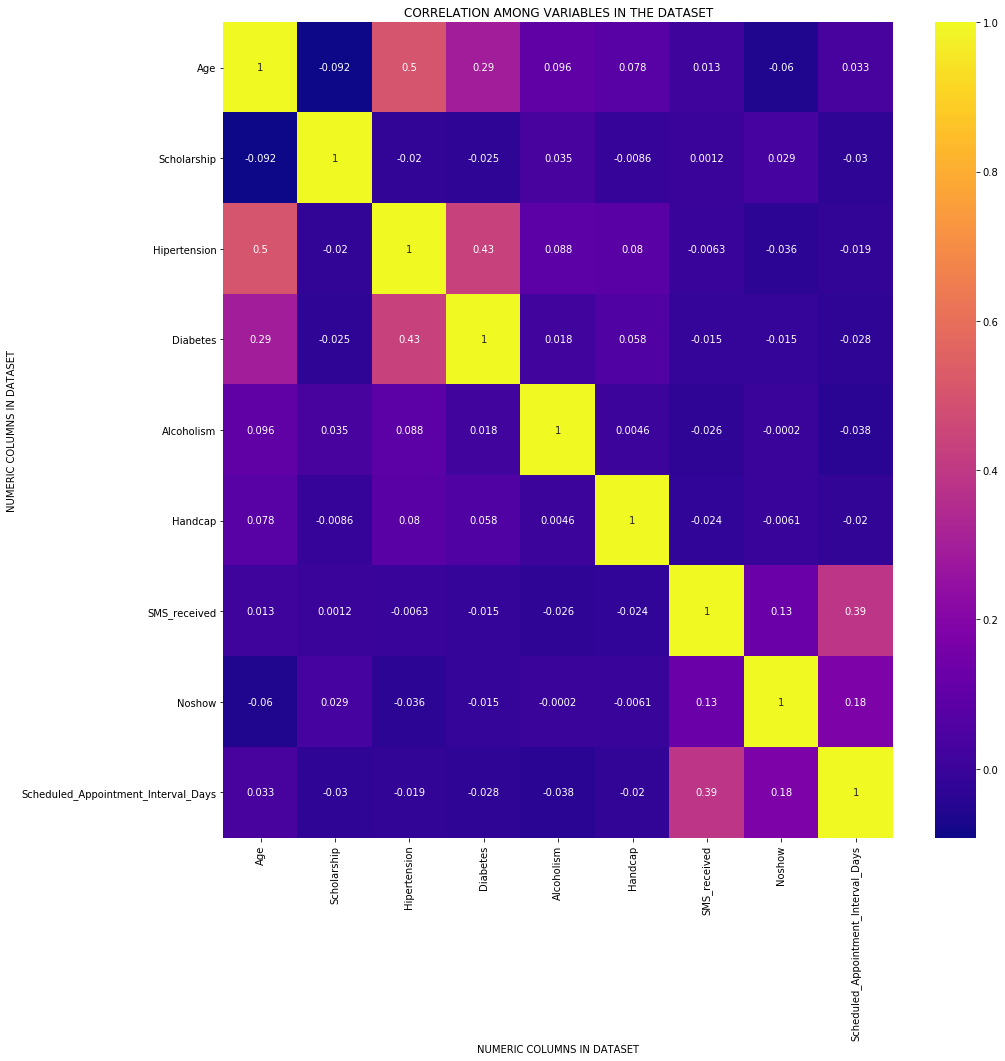

In [26]:
# A correlation coefficient measures the strength of the relationship between two variables
# Let's see the correlation between all numeric variables
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.xlabel('NUMERIC COLUMNS IN DATASET')
plt.ylabel('NUMERIC COLUMNS IN DATASET')
plt.title('CORRELATION AMONG VARIABLES IN THE DATASET');

In [27]:
#Let's limit our correlation to just the focused variable - Noshow
df.corr()['Noshow']

Age                                   -0.060319
Scholarship                            0.029135
Hipertension                          -0.035701
Diabetes                              -0.015180
Alcoholism                            -0.000196
Handcap                               -0.006076
SMS_received                           0.126431
Noshow                                 1.000000
Scheduled_Appointment_Interval_Days    0.180061
Name: Noshow, dtype: float64

> A correlation coefficient measures the strength of the relationship between two variables. It ranges from -1.0 to +1.0.
> A positive correlation shows two variables that tend to move in the same direction.
> A negative correlation shows two variables that tend to move in opposite directions.

# <a id='conclusions'></a>
## Conclusions

Stemming from the heatmap/correlation, the interpretation of the impact of each of the variables on whether a patient shows up or not would be:
> Age: -0.060319 : Implies a very weak negative (downhill sloping) linear relationship

> Scholarship: 0.029135: Implies a weak positive (upward sloping) linear relationship

> Hipertension: -0.035701: Implies a very weak negative (downhill sloping) linear relationship

> Diabetes: -0.015180: Implies a very weak negative (downhill sloping) linear relationship

> Alcoholism: -0.000196: Implies almost no correlation (very weak negative (downhill sloping) linear relationship)

> Handcap: -0.006076: Implies a very weak negative (downhill sloping) linear relationship

> SMS_received: 0.126431: Implies a weak positive (upward sloping) linear relationship

> Scheduled_Appointment_Interval_Days: 0.180061: Implies Implies a weak positive (upward sloping) linear relationship

### Findings:
> Scholarship followed by the number of days between the scheduled day and appointment day has the highest positive correlation and can help in determining if a patient would show up or not. The top 3 in order of positive correlation would be:
1. Schorlarship: 0.029135, 
2. Scheduled_Appointment_Interval_Days: 0.180061, 
3. SMS_received: 0.126431.
> We could for example conclude the higher the number of days between the scheduled day and appointment day, the more likely the patient would show up. Same relationship applies to the other positively correlated variables.


> For negative correlation, the top 3 would be:
1. Age:-0.060319,
2. Hipertension: -0.035701,
3. Diabetes: -0.015180
> We could for example conclude, younger patients are very much likely to show up for appointments. Maybe older patients have difficulties making it down to the hospital or seems to forget the appointment.


### Limitation:
> The seriousness of a disease or medical condition can actually be a major determinant of if a patient will show up for an appointment. For example, it is possible patients with hypertension has more serious case than patients with some other diseases. The reason the patient showed up might not be because he specifically had hypertension but because he is at a life threatening stage. He would have showed up if he was diagnosed for another disease that has gotten him to that stage too. More information on the level of seriousness of the diseases, maybe ranked on a scale would be helpful.

In [28]:
# Before we submit our project, we need to create a .html or .pdf version of this notebook in the workspace here. 
# To do that, run the code cell below. If it worked correctly, we should get a return code of 0, 
# and we should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0